<a href="https://colab.research.google.com/github/abivilion/Planet-Detection-Classification/blob/main/Planet_Detection_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Planet Detection** 
This model made for detecting popular planets of MILKY WAY GALAXY. This model can detect all 8 planets (Mercury-Neptune). This works on Support Vector Machine Algorithm.

**Topic**: Machine Learning

**Category**:  Supervised Machine Learning

**Technique**: Multi-Image Classification

**Module Used**: *autotime,PIL,os,matplotlib,numpy,skimage,sklearn,pickle*



In [ ]:
!pip install ipython-autotime
%load_ext autotime

## **Bad File Detector**
This Verify Bad file like Corrupted images(.jpg) and print it.

In [ ]:
import os
from os import listdir
from PIL import Image

dir_path = "/content/Dat/Earth"


for filename in listdir(dir_path):
    if filename.endswith('.jpg'):
        try:
            img = Image.open(filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError) as e:
            print('Bad file:', filename)
            #os.remove(base_dir+"\\"+filename) (Maybe)

## **Data Preprocessing**

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DDIR = '/content/Dat'
CATG = ['Earth','Jupiter','Mars','Mercury','Neptune','Saturn','Uranus','Venus']

for cate in CATG:
  class_num = CATG.index(cate) # label encoding the values
  path  = os.path.join(DDIR,cate) # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img)) 
    # plt.imshow(img_array) # printing image
   

    #Resizing every image to particular dimension
    #normalize automatically by skimage
    img_resized = resize(img_array,(200,200,3))
    # flattening array
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

# 1D pixel 
flat_data =np.array(flat_data)

target = np.array(target)
images = np.array(images)



    

time: 32.8 s (started: 2021-04-29 15:47:34 +00:00)


# **Splitting Data**: Testing and Train

**Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 447 ms (started: 2021-04-29 15:48:38 +00:00)


**Training**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
hu=svm.SVC(probability=True)
clf = GridSearchCV(hu,param_grid)
clf.fit(x_train,y_train)
y_pred =clf.predict(x_test)
print(f"Predicted Array of Images: {y_pred}")

KeyboardInterrupt: ignored

time: 12.5 s (started: 2021-04-29 18:36:57 +00:00)


In [ ]:
print(f"Original Array - {y_test}")

Original Array - [7 0 4 1 5 1 1 2 6 3 2 7 2 7 0 3 4 5 4 3 7 1 1 1 5 1 4 5 0 4 6 6 0 7 6 7 1
 5 4 3 2 5 5 3 6 4 3 4 2]
time: 6.4 ms (started: 2021-04-29 18:37:55 +00:00)


**Accuracy Score & Classification Report**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(f"Accuracy Percentage(in %) : {accuracy_score(y_pred,y_test)*100}%")
print(f"\nConfusion Matrix - \n\n {confusion_matrix(y_pred,y_test)}")

Accuracy Percentage(in %) : 53.06122448979592%

Confusion Matrix - 

 [[3 0 0 1 1 0 0 0]
 [0 3 0 1 0 4 0 0]
 [0 1 5 0 0 1 0 1]
 [1 3 0 3 1 0 0 2]
 [0 0 0 1 5 0 2 0]
 [0 1 0 0 1 2 1 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 3]]
time: 11.4 ms (started: 2021-04-29 18:30:44 +00:00)


# **Saving The model**

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 131 ms (started: 2021-04-29 16:05:40 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 97.2 ms (started: 2021-04-29 16:08:45 +00:00)


## **`Testing`**

Here, User Just need to provide link of any planet image and it predicts the planet.

Enter your URL https://i.pinimg.com/originals/aa/2f/78/aa2f78effbe107f23b6e5a3aebd4d563.jpg
(1017, 1920, 3)
PREDICTED PLANET : Saturn Found!


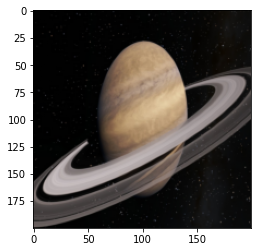

time: 3.13 s (started: 2021-04-29 18:57:11 +00:00)


In [88]:
flat_data = []
url = input('Enter your URL ')
img = imread(url)
img_resized = resize(img,(200,200,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATG[y_out[0]]
print(f'PREDICTED PLANET : {y_out} Found!')